In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from typing import Tuple, Callable, Optional, List
import seaborn as sns
import scipy as sp

import frame_whitening as fw
import frame_whitening.plot as fwplt
from frame_whitening import stats
from frame_whitening import simulation_new as sim

/mnt/home/lduong/miniconda3/envs/frame/lib/python3.9/site-packages/scipy/__init__.py:162: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(


In [23]:
seed = 42069
np.random.seed(seed)
n, k = 2, 3
batch_size = 32
n_batch = 1000
lr_g = 1E-1

V, _ = np.linalg.qr(np.random.randn(n, n))
theta = np.deg2rad(55)
V = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
Cxx0 = V @ np.diag([4, 1]) @ V.T * 0.1
Cxx0 *= 50
cholesky_list = [np.linalg.cholesky(C) for C in [Cxx0]]
W = fw.get_mercedes_frame()
W = np.array([[0, 1, 1], [1, 1, 0]])
W = fw.normalize_frame(W)

g0 = np.array([0.01, 1.2, 0.25])
g, g_all, errors, variances = sim.simulate(cholesky_list, W, batch_size, n_batch, lr_g, g0=g0, online=False, seed=seed)

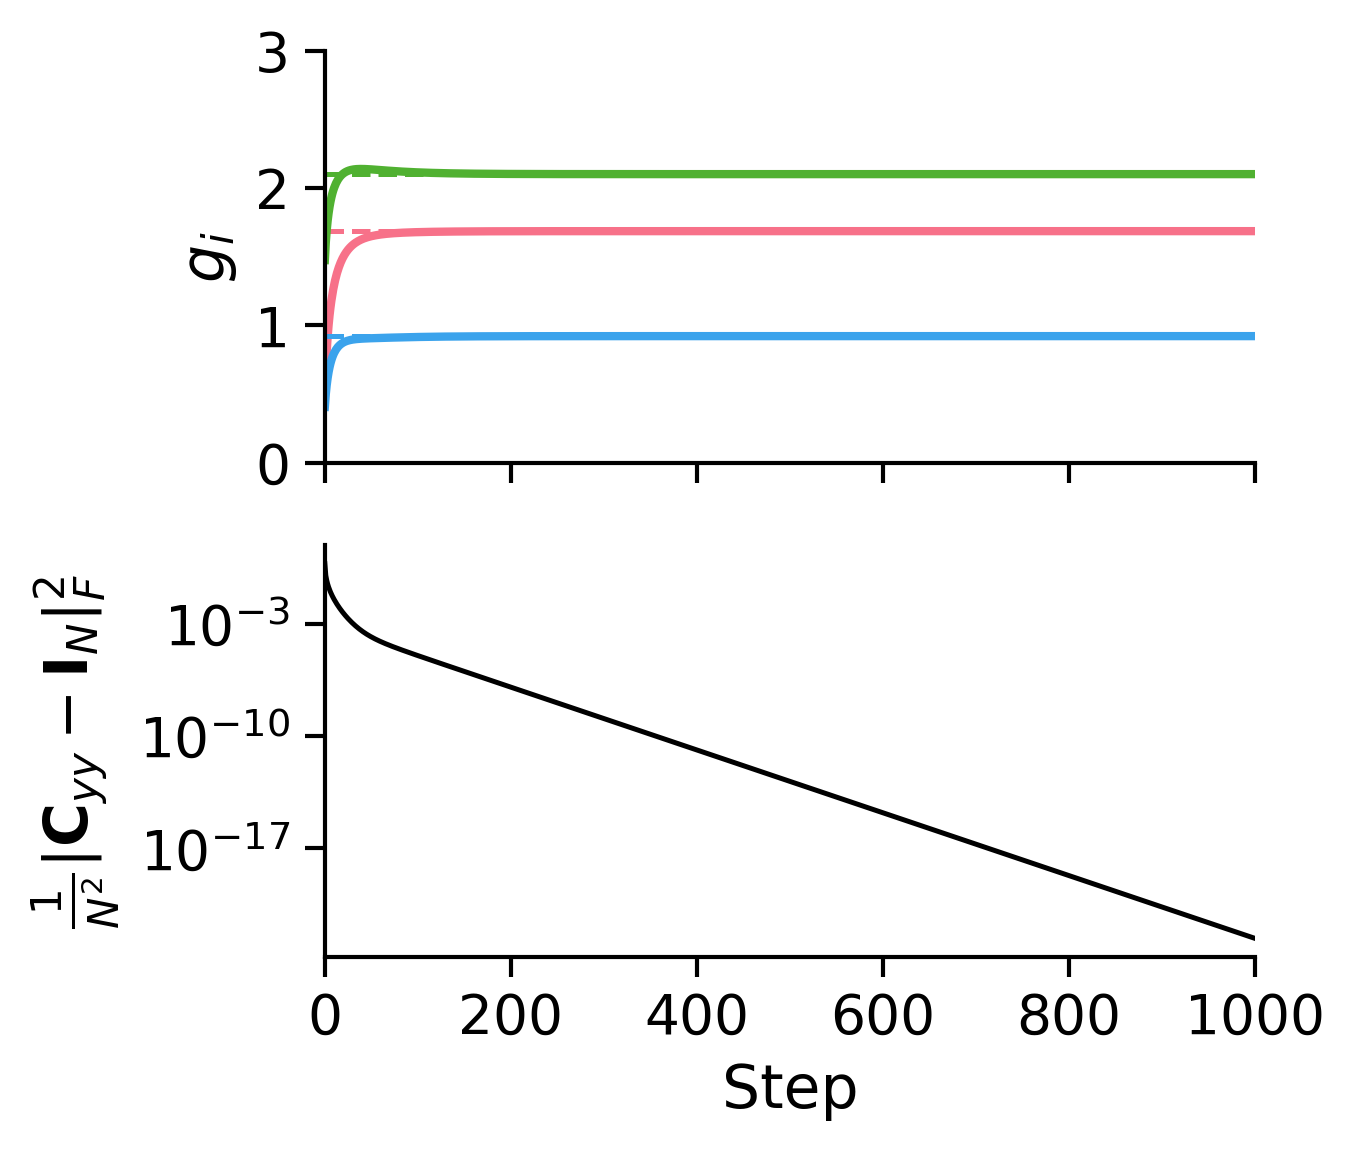

In [24]:
with sns.plotting_context("paper", font_scale=1.5):
    fig, ax = plt.subplots(2, 1, figsize=(4, 4), sharex="all", dpi=300)
    g_opt = sim.get_g_opt(W, Cxx0)
    cols = sns.color_palette("husl", 3)
    for i in range(k):
        ax[0].plot(g_all[:,i], color=cols[i], label=f"g{i}", linewidth=2)
        ax[0].axhline(g_opt[i], color=cols[i], linestyle='--')
    ax[0].set(ylabel=r"$g_i$", xlim=(0, n_batch), ylim=(0, 3))
    ax[1].plot(errors, "k")
    ax[1].set(ylabel=r"$\frac{1}{N^2}\|{\bf C}_{yy} - {\bf I}_N\|_{F}^2$", xlabel="Step", yscale="log")
    sns.despine()